# Museums, Aquariums and Zoos

In [51]:
#Data Wrangling, currently working on making this a git repository, before starting
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import numpy as np
import plotly.express as px

In [62]:
df =pd.read_csv("./museums.csv", index_col=0)
df.head()

C:\Users\book_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (9,14,21) have mixed types.Specify dtype option on import or set low_memory=False.



Museum Name  \
Museum ID                                                       
8400200098                    ALASKA AVIATION HERITAGE MUSEUM   
8400200117                            ALASKA BOTANICAL GARDEN   
8400200153  ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...   
8400200143                ALASKA EDUCATORS HISTORICAL SOCIETY   
8400200027                             ALASKA HERITAGE MUSEUM   

                                                   Legal Name Alternate Name  \
Museum ID                                                                      
8400200098                    ALASKA AVIATION HERITAGE MUSEUM            NaN   
8400200117                        ALASKA BOTANICAL GARDEN INC            NaN   
8400200153  ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...            NaN   
8400200143                ALASKA EDUCATORS HISTORICAL SOCIETY            NaN   
8400200027                    ALASKA AVIATION HERITAGE MUSEUM            NaN   

                                              Museum Type Institution Name  \
Museum ID                                                                    
8400200098                                 HISTORY MUSEUM              NaN   
8400200117  ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER              NaN   
8400200153     SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM              NaN   
8400200143                          HISTORIC PRESERVATION              NaN   
8400200027                                 HISTORY MUSEUM              NaN   

           Street Address (Administrative Location)  \
Museum ID                                             
8400200098                         4721 AIRCRAFT DR   
8400200117                4601 CAMPBELL AIRSTRIP RD   
8400200153                      9711 KENAI SPUR HWY   
8400200143                         214 BIRCH STREET   
8400200027               301 W NORTHERN LIGHTS BLVD   

           City (Administrative Location) State (Administrative Location)  \
Museum ID                                                                   
8400200098                      ANCHORAGE                              AK   
8400200117                      ANCHORAGE                              AK   
8400200153                          KENAI                              AK   
8400200143                          KENAI                              AK   
8400200027                      ANCHORAGE                              AK   

           Zip Code (Administrative Location)  \
Museum ID                                       
8400200098                              99502   
8400200117                              99507   
8400200153                              99611   
8400200143                              99611   
8400200027                              99503   

           Street Address (Physical Location)  ...  Latitude  Longitude  \
Museum ID                                      ...                        
8400200098                                NaN  ...  61.17925 -149.97254   
8400200117                                NaN  ...  61.16890 -149.76708   
8400200153                                NaN  ...  60.56149 -151.21598   
8400200143                                NaN  ...  60.56280 -151.26597   
8400200027                                NaN  ...  61.17925 -149.97254   

            Locale Code (NCES) County Code (FIPS)  State Code (FIPS)  \
Museum ID                                                              
8400200098                 1.0               20.0                2.0   
8400200117                 4.0               20.0                2.0   
8400200153                 3.0              122.0                2.0   
8400200143                 3.0              122.0                2.0   
8400200027                 1.0               20.0                2.0   

            Region Code (AAM)  Employer ID Number  Tax Period     Income  \
Museum ID                                                                  
8400200098                  6    

In [63]:
print(df.shape)
df.isnull().sum()

(33072, 24)


Museum Name                                     0
Legal Name                                      0
Alternate Name                              31145
Museum Type                                     0
Institution Name                            30323
Street Address (Administrative Location)       10
City (Administrative Location)                  0
State (Administrative Location)                 0
Zip Code (Administrative Location)              0
Street Address (Physical Location)          23856
City (Physical Location)                    23849
State (Physical Location)                   23849
Zip Code (Physical Location)                23851
Phone Number                                10140
Latitude                                       65
Longitude                                      65
Locale Code (NCES)                             77
County Code (FIPS)                           2536
State Code (FIPS)                               1
Region Code (AAM)                               0


In my exploration of the Location data, I found that only about 1.5% of the data that contained both Administrative and Physical Location data, had that information for the state differing, and 10% for the city differing. For the purpose of this analysis we are interested in the physical location, and for those missing data we will assume that they likely have the same physical location as their administrative location. 

We are disregarding Street Adress.

In [64]:
#df['City (Physical Location)'].fillna(df['City (Administrative Location)'], inplace=True)
#df['State (Physical Location)'].fillna(df['State (Administrative Location)'], inplace=True)
df.rename(columns={'City (Physical Location)':'City', 'State (Physical Location)': 'State', 'City (Administrative Location)': 'City_Admin', 'State (Administrative Location)': 'State_Admin', 'Zip Code (Administrative Location)': 'Zip_Admin', 'Zip Code (Physical Location)': 'Zip'}, inplace=True)
df.City = np.where(df.City.isnull(), df.City_Admin, df.City)
df.State = np.where(df.State.isnull(), df.State_Admin, df.State)
df.Zip = np.where(df.Zip.isnull(), df.Zip_Admin, df.Zip)
df.drop(columns=['Alternate Name', 'Institution Name', 'Street Address (Administrative Location)', 'City_Admin', 'State_Admin', 'Street Address (Physical Location)', 'Zip_Admin'], inplace=True)

In [65]:
df.isnull().sum()

Museum Name               0
Legal Name                0
Museum Type               0
City                      0
State                     0
Zip                       0
Phone Number          10140
Latitude                 65
Longitude                65
Locale Code (NCES)       77
County Code (FIPS)     2536
State Code (FIPS)         1
Region Code (AAM)         0
Employer ID Number     5518
Tax Period             9792
Income                10111
Revenue               10782
dtype: int64

In [91]:
df.Income = np.where(df.Income.isnull(), df.Income.median(), df.Income)
df.Revenue = np.where(df.Revenue.isnull(), df.Revenue.median(), df.Revenue)

In [95]:
df.isnull().sum()

Museum Name               0
Legal Name                0
Museum Type               0
City                      0
State                     0
Zip                       0
Phone Number          10140
Latitude                 65
Longitude                65
Locale Code (NCES)       77
County Code (FIPS)     2536
State Code (FIPS)         1
Region Code (AAM)         0
Employer ID Number     5518
Tax Period             9792
Income                    0
Revenue                   0
dtype: int64

TypeError: cannot perform reduce with flexible type

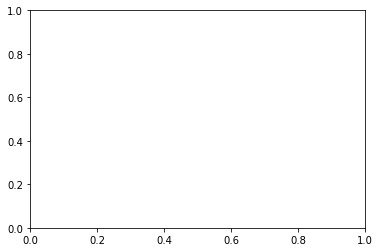

In [96]:
#df['Revenue'].hist()

plt.boxplot(['Income', 'Revenue'], data=df)
plt.tight_layout()
plt.show()

In [99]:
df_pos = df[df['Revenue']>=0]

fig = px.scatter_geo(data_frame=df_pos, locations="State", locationmode='USA-states', color="Museum Type",
                     hover_name="Museum Type", size="Revenue",
                     projection="albers usa")
fig.show()

In [5]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()